> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset No-how Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 14})


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,110517,110518,110519,110520,110521,110522,110523,110524,110525,110526
PatientId,2.98725e+13,5.58998e+14,4.26296e+12,8.67951e+11,8.84119e+12,9.59851e+13,7.33688e+14,3.44983e+12,5.63947e+13,7.81246e+13,...,5.57494e+12,7.26331e+13,6.54239e+13,9.96998e+14,3.63553e+13,2.57213e+12,3.59627e+12,1.55766e+13,9.21349e+13,3.77512e+14
AppointmentID,5642903,5642503,5642549,5642828,5642494,5626772,5630279,5630575,5638447,5629123,...,5780122,5630375,5630447,5650534,5651072,5651768,5650093,5630692,5630323,5629448
Gender,F,M,F,F,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
ScheduledDay,2016-04-29T18:38:08Z,2016-04-29T16:08:27Z,2016-04-29T16:19:04Z,2016-04-29T17:29:31Z,2016-04-29T16:07:23Z,2016-04-27T08:36:51Z,2016-04-27T15:05:12Z,2016-04-27T15:39:58Z,2016-04-29T08:02:16Z,2016-04-27T12:48:25Z,...,2016-06-07T07:38:34Z,2016-04-27T15:15:06Z,2016-04-27T15:23:14Z,2016-05-03T07:51:47Z,2016-05-03T08:23:40Z,2016-05-03T09:15:35Z,2016-05-03T07:27:33Z,2016-04-27T16:03:52Z,2016-04-27T15:09:23Z,2016-04-27T13:30:56Z
AppointmentDay,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,...,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z,2016-06-07T00:00:00Z
Age,62,56,62,8,56,76,23,39,21,19,...,19,50,22,42,53,56,51,21,38,54
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA,REPÚBLICA,GOIABEIRAS,GOIABEIRAS,ANDORINHAS,CONQUISTA,...,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ
Scholarship,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hipertension,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Diabetes,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [11]:
data = df
data.columns = map(str.lower, data.columns)
data.rename(columns={'alcolism':'alcoholism','hipertension':'hypertension','handcap':'handicap','scheduledday':'scheduled_day','appointmentday':'appointment_day','no-show':'no_show'},inplace=True)
data['patientid'] = data['patientid'].astype(int)
data['appointmentid'] = data['patientid'].astype(int)
data.loc[data.age < 0, "age"] = int(data.age.mode())
data['age_range'] = pd.qcut(data.age, 4, labels=["child","young","adult","aged"])
data['appointment_day'] = pd.to_datetime(data['appointment_day'])
data['scheduled_day'] = pd.to_datetime(data['scheduled_day'])
data['scheduled_time'] = data['scheduled_day'].apply(lambda time: time.time)
data['scheduled_hour'] = data['scheduled_day'].apply(lambda time: time.hour)
data['scheduled_month'] = data['scheduled_day'].apply(lambda time: time.month)
data['scheduled_dayofweek'] = data['scheduled_day'].dt.weekday_name
data['elapsed_days'] = data['appointment_day'] - data['scheduled_day']
data['diabetes'] = data['diabetes'].astype('uint8')
data['hypertension'] = data['diabetes'].astype('uint8')
data['scholarship'] = data['scholarship'].astype('uint8')
data['alcoholism'] = data['alcoholism'].astype('uint8')
data['sms_received'] = data['sms_received'].astype('uint8')
data = pd.concat([data, pd.get_dummies(data['handicap'],prefix='handicap')], axis=1); 
data = pd.concat([data, pd.get_dummies(data['age_range'],prefix='age_range')], axis=1); 
data = pd.concat([data, pd.get_dummies(data['no_show'],prefix='no_show')], axis=1); 
data = pd.concat([data, pd.get_dummies(data['gender'],prefix='gender')], axis=1); 
data = pd.concat([data, pd.get_dummies(data['sms_received'],prefix='sms_received')], axis=1); 
data.rename(columns={'sms_received_0':'sms_received_no', 'sms_received_1':'sms_received_yes'},inplace=True);
data=data.drop(['sms_received'], axis=1)
data.columns = map(str.lower, data.columns)
data.head()

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,...,age_range_child,age_range_young,age_range_adult,age_range_aged,no_show_no,no_show_yes,gender_f,gender_m,sms_received_no,sms_received_yes
0,29872499824296,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,0,0,...,0,0,0,1,1,0,1,0,1,0
1,558997776694438,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,0,0,1,1,0,0,1,1,0
2,4262962299951,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,0,0,1,1,0,1,0,1,0
3,867951213174,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,1,0,0,0,1,0,1,0,1,0
4,8841186448183,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,0,0,1,1,0,1,0,1,0


In [12]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,110517,110518,110519,110520,110521,110522,110523,110524,110525,110526
patientid,29872499824296,558997776694438,4262962299951,867951213174,8841186448183,95985133231274,733688164476661,3449833394123,56394729949972,78124564369297,...,5574942418928,72633149253362,65423877893936,996997666245785,36355337746436,2572134369293,3596266328735,15576631729893,92134931435557,377511518121127
appointmentid,29872499824296,558997776694438,4262962299951,867951213174,8841186448183,95985133231274,733688164476661,3449833394123,56394729949972,78124564369297,...,5574942418928,72633149253362,65423877893936,996997666245785,36355337746436,2572134369293,3596266328735,15576631729893,92134931435557,377511518121127
gender,F,M,F,F,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
scheduled_day,2016-04-29 18:38:08,2016-04-29 16:08:27,2016-04-29 16:19:04,2016-04-29 17:29:31,2016-04-29 16:07:23,2016-04-27 08:36:51,2016-04-27 15:05:12,2016-04-27 15:39:58,2016-04-29 08:02:16,2016-04-27 12:48:25,...,2016-06-07 07:38:34,2016-04-27 15:15:06,2016-04-27 15:23:14,2016-05-03 07:51:47,2016-05-03 08:23:40,2016-05-03 09:15:35,2016-05-03 07:27:33,2016-04-27 16:03:52,2016-04-27 15:09:23,2016-04-27 13:30:56
appointment_day,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,...,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00,2016-06-07 00:00:00
age,62,56,62,8,56,76,23,39,21,19,...,19,50,22,42,53,56,51,21,38,54
neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA,REPÚBLICA,GOIABEIRAS,GOIABEIRAS,ANDORINHAS,CONQUISTA,...,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ,MARIA ORTIZ
scholarship,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hypertension,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
diabetes,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 34 columns):
patientid              110527 non-null int64
appointmentid          110527 non-null int64
gender                 110527 non-null object
scheduled_day          110527 non-null datetime64[ns]
appointment_day        110527 non-null datetime64[ns]
age                    110527 non-null int64
neighbourhood          110527 non-null object
scholarship            110527 non-null uint8
hypertension           110527 non-null uint8
diabetes               110527 non-null uint8
alcoholism             110527 non-null uint8
handicap               110527 non-null int64
no_show                110527 non-null object
age_range              110527 non-null category
scheduled_time         110527 non-null object
scheduled_hour         110527 non-null int64
scheduled_month        110527 non-null int64
scheduled_dayofweek    110527 non-null object
elapsed_days           110527 non-null timedelta64[ns

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 What is the overall status of patients attendances to appointments?


In [14]:
#define function to determine the percentage of patients not attending appointments by certain feature
def percentage_noshow(dataframe,feature):
    dataframe_no_show_yes = dataframe[feature] * dataframe['no_show_yes']
    return round((dataframe_no_show_yes.sum() / len(dataframe.index)) * 100,2)


In [15]:
no_show_yes_percentage = round((data[data['no_show_yes']==1]['no_show_yes'].count()/data['no_show'].count())*100,2)
no_show_no_percentage = round((data[data['no_show_no']==1]['no_show_no'].count()/data['no_show'].count())*100,2)
print('Percentage of patients not attending appointments: {}%'.format(no_show_yes_percentage))
print('Percentage of patients attending appointments: {}%'.format(no_show_no_percentage))

Percentage of patients not attending appointments: 20.19%
Percentage of patients attending appointments: 79.81%


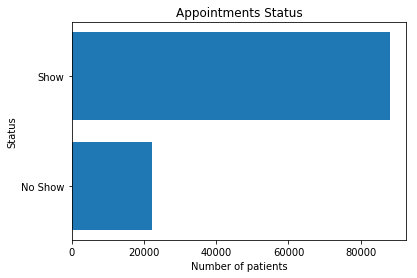

In [16]:
x = ["No Show","Show"]
shows = [data['no_show_yes'].sum(),data['no_show_no'].sum()]

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, shows)
plt.ylabel("Status")
plt.xlabel("Number of patients")
plt.title("Appointments Status")

plt.yticks(x_pos, x)

plt.show()

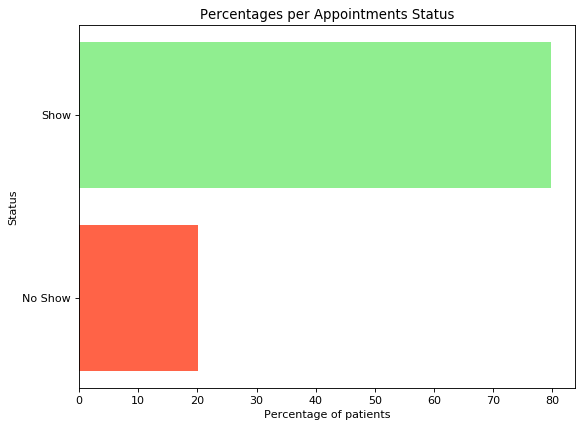

In [17]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
x = ["No Show","Show"]
shows = [round(data['no_show_yes'].sum()/data['no_show_yes'].count()*100,2),round(data['no_show_no'].sum()/data['no_show_no'].count()*100,2)]
colors = ['tomato', 'lightgreen']

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, shows,color = colors)
plt.ylabel("Status")
plt.xlabel("Percentage of patients")
plt.title("Percentages per Appointments Status")

plt.yticks(x_pos, x)

plt.show()

In [18]:
no_show_yes = data[data['no_show_yes']==1]
no_show_no = data[data['no_show_no']==1]
no_show_yes.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,scheduled_hour,scheduled_month,...,age_range_child,age_range_young,age_range_adult,age_range_aged,no_show_no,no_show_yes,gender_f,gender_m,sms_received_no,sms_received_yes
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,...,22319.000000,22319.000000,22319.000000,22319.000000,22319.0,22319.0,22319.000000,22319.000000,22319.000000,22319.000000
mean,1.467523e+14,1.467523e+14,34.317667,0.115507,0.064071,0.064071,0.030333,0.020297,11.162597,4.594964,...,0.284377,0.287378,0.235450,0.192795,0.0,1.0,0.653882,0.346118,0.561629,0.438371
std,2.549905e+14,2.549905e+14,21.965941,0.319640,0.244885,0.244885,0.171505,0.156670,3.219395,0.742814,...,0.451127,0.452550,0.424289,0.394503,0.0,0.0,0.475742,0.475742,0.496198,0.496198
min,5.628261e+06,5.628261e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000
25%,4.176779e+12,4.176779e+12,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000
50%,3.156794e+13,3.156794e+13,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000
75%,9.454270e+13,9.454270e+13,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,5.000000,...,1.000000,1.000000,0.000000,0.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000
max,9.996585e+14,9.996585e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,21.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000


In [19]:
for col in data.select_dtypes([np.uint8]):
    print("Percentage of no-show in {0} is {1}.".format(col, percentage_noshow(data,col)))

Percentage of no-show in scholarship is 2.33.
Percentage of no-show in hypertension is 1.29.
Percentage of no-show in diabetes is 1.29.
Percentage of no-show in alcoholism is 0.61.
Percentage of no-show in handicap_0 is 19.83.
Percentage of no-show in handicap_1 is 0.33.
Percentage of no-show in handicap_2 is 0.03.
Percentage of no-show in handicap_3 is 0.0.
Percentage of no-show in handicap_4 is 0.0.
Percentage of no-show in age_range_child is 5.74.
Percentage of no-show in age_range_young is 5.8.
Percentage of no-show in age_range_adult is 4.75.
Percentage of no-show in age_range_aged is 3.89.
Percentage of no-show in no_show_no is 0.0.
Percentage of no-show in no_show_yes is 20.19.
Percentage of no-show in gender_f is 13.2.
Percentage of no-show in gender_m is 6.99.
Percentage of no-show in sms_received_no is 11.34.
Percentage of no-show in sms_received_yes is 8.85.


### Research Question 2 What are the importance of  weekday, hours in attendance of appointments?

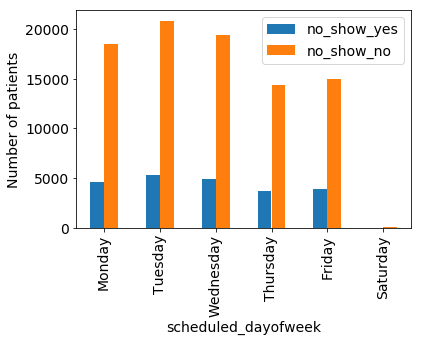

In [20]:
plt.rcParams.update({'font.size': 14})
data.groupby('scheduled_dayofweek').sum()[['no_show_yes','no_show_no']].loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday']].plot(kind='bar');
plt.ylabel("Number of patients");
plt.show();

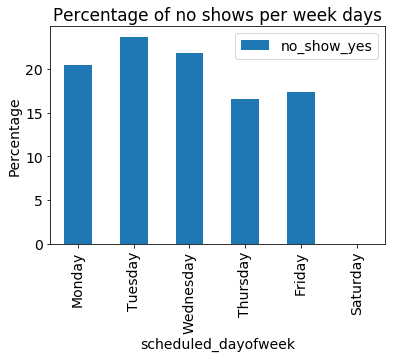

In [21]:
scheduled_dow_yes = data.groupby(['scheduled_dayofweek']).agg({'no_show_yes': 'sum'})
scheduled_dow_yes_percentages = scheduled_dow_yes.apply(lambda x:  100 * x / float(x.sum()))
scheduled_dow_yes_percentages.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday']].plot(kind='bar');
plt.title("Percentage of no shows per week days")
plt.ylabel("Percentage");

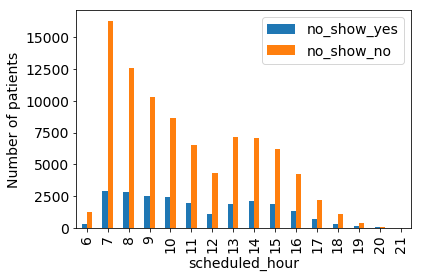

In [22]:
data.groupby('scheduled_hour').sum()[['no_show_yes','no_show_no']].plot(kind='bar');
plt.ylabel("Number of patients");

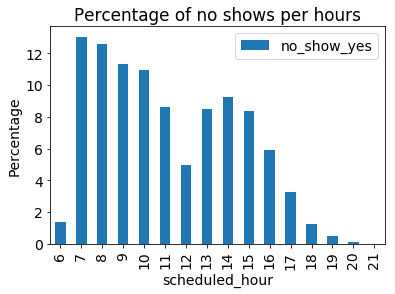

In [25]:
scheduled_dow_yes = data.groupby(['scheduled_hour']).agg({'no_show_yes': 'sum'})
scheduled_dow_yes_percentages = scheduled_dow_yes.apply(lambda x:  100 * x / float(x.sum()))
scheduled_dow_yes_percentages.plot(kind='bar');
plt.title("Percentage of no shows per hours")
plt.ylabel("Percentage");

### Research Question 3 What are the importance of age?

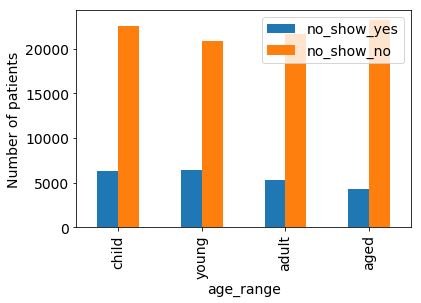

In [26]:
data.groupby('age_range').sum()[['no_show_yes','no_show_no']].plot(kind='bar');
plt.ylabel("Number of patients");

### Research Question 4 What are the importance of health diagnosis; hypertension,diabetes,alcoholism, handicap as well as gender and sms_received in attendance of appointments?

In [27]:
keys = np.array([])
vals = np.array([])
for col in data.select_dtypes([np.uint8]):
    print("Percentage of no-show in {0} is {1}.".format(col, percentage_noshow(no_show_yes,col)))
    keys=np.append(keys,col)
    vals=np.append(vals,percentage_noshow(data,col))

Percentage of no-show in scholarship is 11.55.
Percentage of no-show in hypertension is 6.41.
Percentage of no-show in diabetes is 6.41.
Percentage of no-show in alcoholism is 3.03.
Percentage of no-show in handicap_0 is 98.18.
Percentage of no-show in handicap_1 is 1.64.
Percentage of no-show in handicap_2 is 0.17.
Percentage of no-show in handicap_3 is 0.01.
Percentage of no-show in handicap_4 is 0.0.
Percentage of no-show in age_range_child is 28.44.
Percentage of no-show in age_range_young is 28.74.
Percentage of no-show in age_range_adult is 23.54.
Percentage of no-show in age_range_aged is 19.28.
Percentage of no-show in no_show_no is 0.0.
Percentage of no-show in no_show_yes is 100.0.
Percentage of no-show in gender_f is 65.39.
Percentage of no-show in gender_m is 34.61.
Percentage of no-show in sms_received_no is 56.16.
Percentage of no-show in sms_received_yes is 43.84.


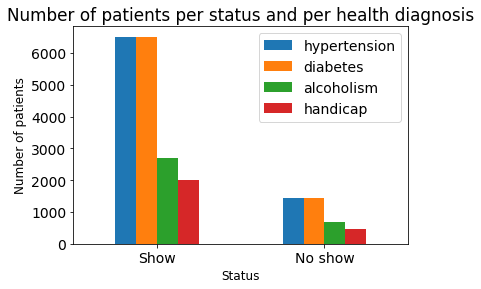

In [28]:
ax = data.groupby('no_show_yes').sum()[['hypertension','diabetes','alcoholism','handicap']].plot(kind='bar');
ax.set_xlabel("Status",fontsize=12);
ax.set_ylabel("Number of patients",fontsize=12);
ax.set_xticklabels(['Show',"No show"], rotation=0);
plt.title('Number of patients per status and per health diagnosis')
plt.show();

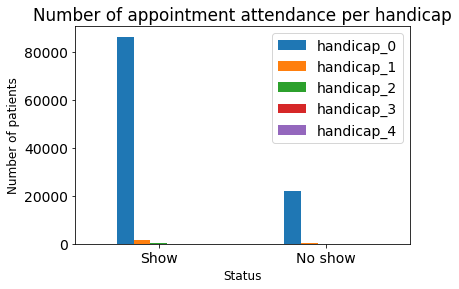

In [30]:
ax = data.groupby('no_show_yes').sum()[['handicap_0','handicap_1','handicap_2','handicap_3','handicap_4']].plot(kind='bar');
ax.set_xlabel("Status",fontsize=12);
ax.set_ylabel("Number of patients",fontsize=12);
ax.set_xticklabels(['Show',"No show"], rotation=0);
plt.title('Number of appointment attendance per handicap')
plt.show();

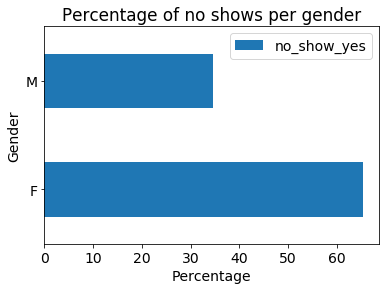

In [31]:
gender_yes = data.groupby(['gender']).agg({'no_show_yes': 'sum'})
gender_yes_percentages = gender_yes.apply(lambda x:  100 * x / float(x.sum()))
gender_yes_percentages.plot(kind='barh');
plt.title("Percentage of no shows per gender")
plt.xlabel("Percentage");
plt.ylabel("Gender");

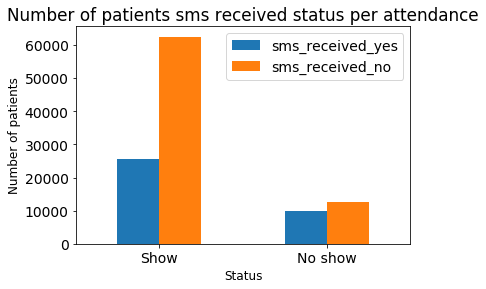

In [32]:
ax = data.groupby('no_show_yes').sum()[['sms_received_yes','sms_received_no']].plot(kind='bar');
ax.set_xlabel("Status",fontsize=12);
ax.set_ylabel("Number of patients",fontsize=12);
ax.set_xticklabels(['Show',"No show"], rotation=0);
plt.title('Number of patients sms received status per attendance')
plt.show();

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!